In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

C:\Users\srira\AppData\Local\Temp\ipykernel_17044\486848988.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv('Dataset/adult.data.txt', sep=", ", header=None, engine='python')
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
              "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df['salary-bin'] = df['salary-range'].apply(lambda x: 1 if x == '>50K' else 0)

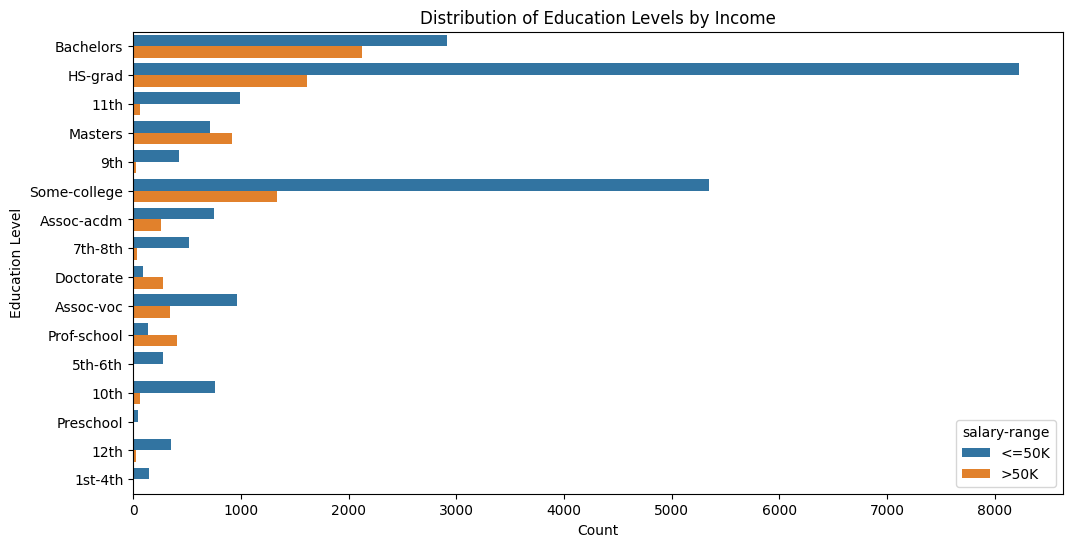

In [3]:
# User Story 1: Visualization of Education Level Distribution by Income
plt.figure(figsize=(12, 6))
sns.countplot(y='education', hue='salary-range', data=df)
plt.title('Distribution of Education Levels by Income')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

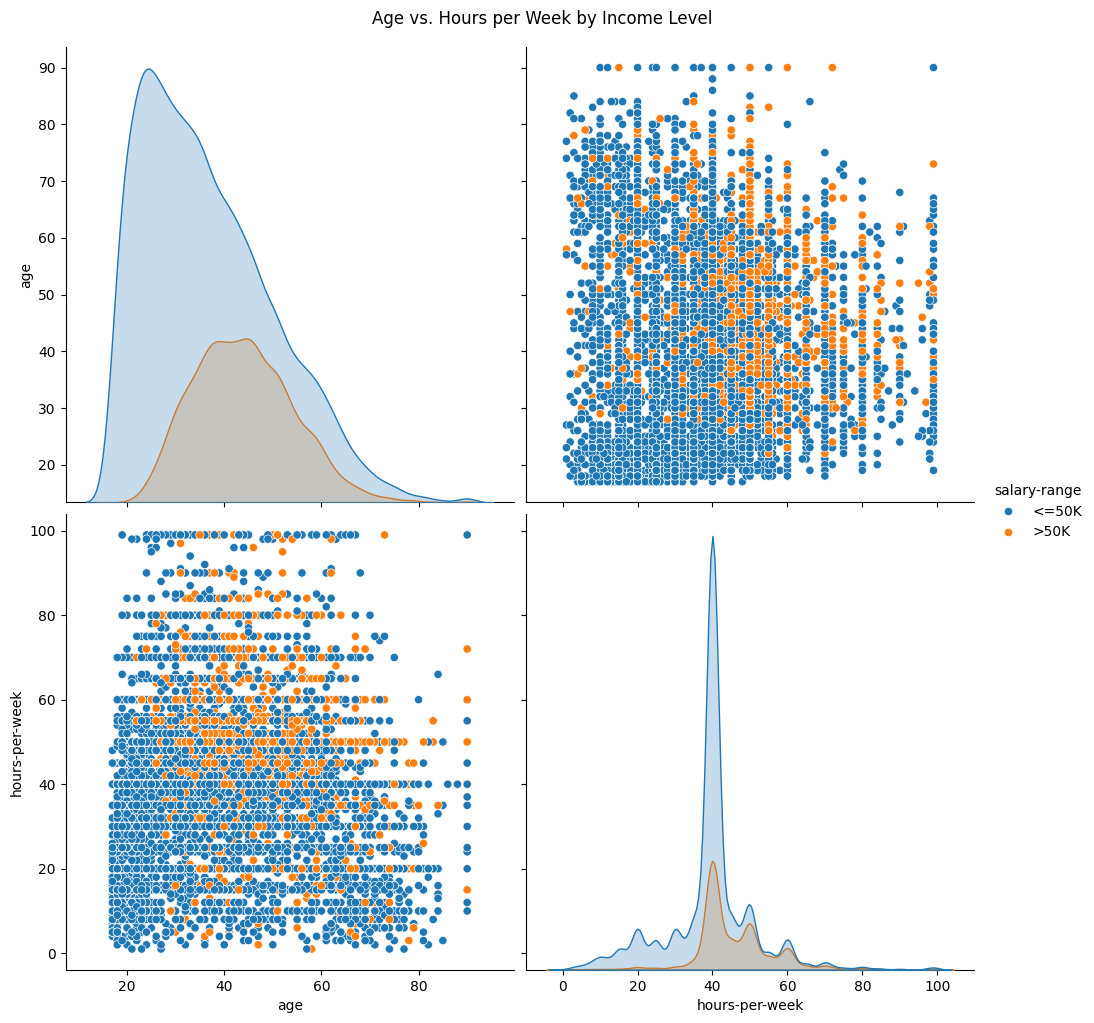

In [4]:
# User Story 2: Multivariate Scatter Plot of Age, Hours per Week by Income
sns.pairplot(df, vars=['age', 'hours-per-week'], hue='salary-range', height=5, aspect=1)
plt.suptitle('Age vs. Hours per Week by Income Level', y=1.02)
plt.show()

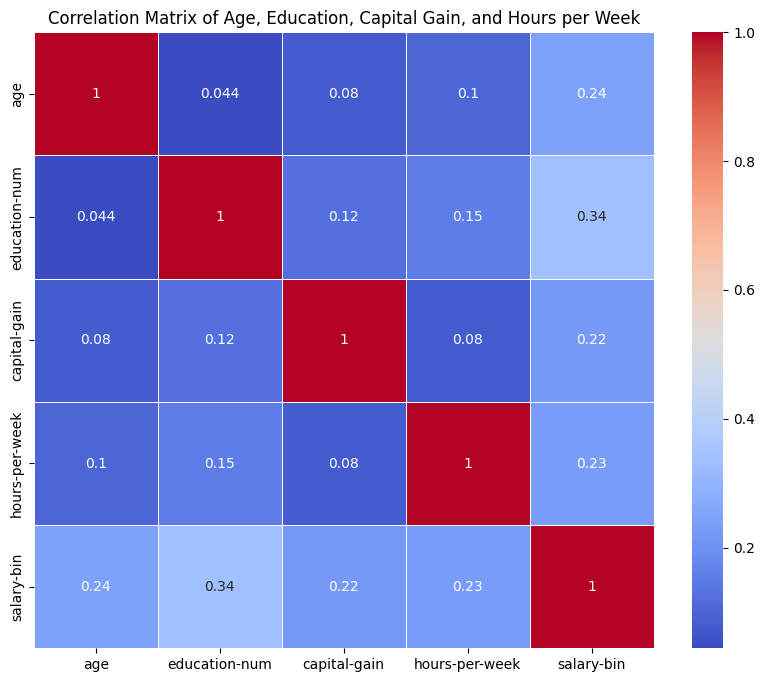

In [5]:
# User Story 3: Multivariate analysis of Age, Education, Capital Gain, Hours per Week, and Income
# Creating a correlation matrix for further calculation
numeric_cols = ['age', 'education-num', 'capital-gain', 'hours-per-week', 'salary-bin']
correlation_matrix = df[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Age, Education, Capital Gain, and Hours per Week')
plt.show()

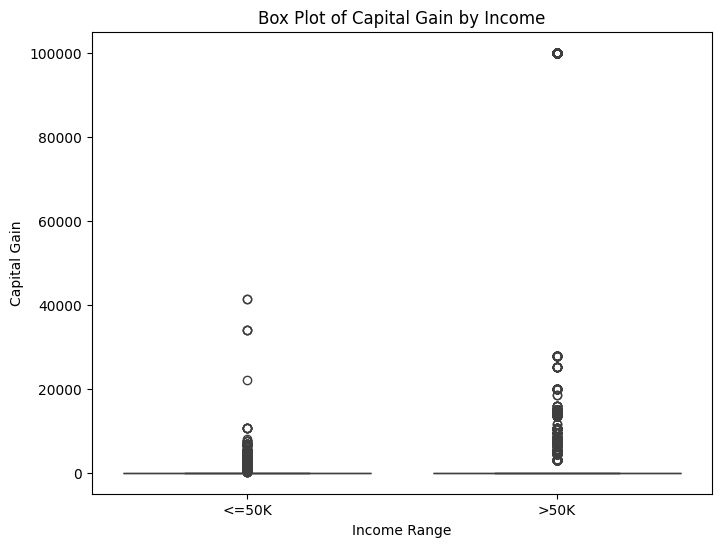

In [6]:
# User Story 4: Box Plot of Capital Gain by Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='salary-range', y='capital-gain', data=df)
plt.title('Box Plot of Capital Gain by Income')
plt.xlabel('Income Range')
plt.ylabel('Capital Gain')
plt.show()

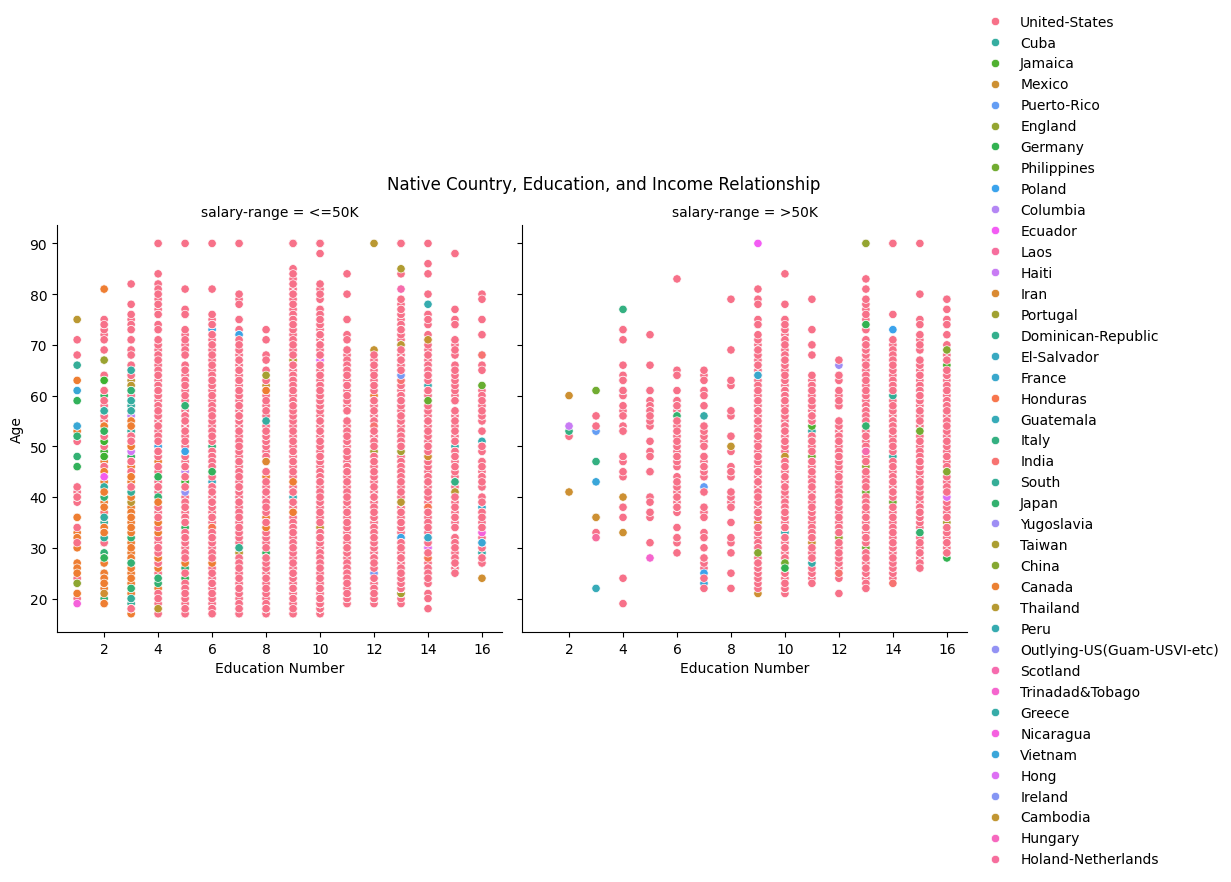

In [7]:
# User Story 5: Multivariate Analysis of Native Country, Education and Income
g = sns.FacetGrid(df, col='salary-range', height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x='education-num', y='age', hue='native-country')
g.add_legend()
g.fig.suptitle('Native Country, Education, and Income Relationship', y=1.03)
g.set_axis_labels('Education Number', 'Age')
plt.show()